In [268]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import math
import requests
from bs4 import BeautifulSoup
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
pd.set_option("display.max_columns",100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
## Proxy settings when using cntlm
http_proxy  = "http://localhost:3128"
https_proxy = "https://localhost:3128"

proxyDict = { 
              "http"  : http_proxy, 
              "https" : https_proxy, 
            }
proxyDict = None

In [270]:
mapping = {
    'Richmond': 'richmond',
    'West Coast': 'westcoast',
    'Sydney': 'swans',
    'Adelaide': 'adelaide',
    'Geelong': 'geelong',
    'Greater Western Sydney': 'gws',
    'Melbourne': 'melbourne',
    'Port Adelaide': 'padelaide',
    'Collingwood': 'collingwood',
    'Hawthorn': 'hawthorn',
    'Essendon': 'essendon',
    'Western Bulldogs': 'bullldogs',
    'St Kilda': 'stkilda',
    'North Melbourne': 'kangaroos',
    'Kangaroos' : 'kangaroos',
    'Fremantle': 'fremantle',
    'Brisbane Lions': 'brisbanel',
    'Gold Coast': 'goldcoast',
    'Carlton': 'carlton'
}
teams = list(mapping.keys())

In [ ]:
from data_prep.team_history import History
# team_df = History(mapping, proxyDict).generate_team_history()

In [ ]:
from data_prep.team_history import History
# History(mapping, proxyDict).generate_game_data('training-all/', team_df)

In [271]:
X_list = []
y_list = []

for i in range(1,16):
    X = np.load('training-all/training-'+str(2019-i)+'.npy')

    mask = np.isnan(X).any(axis=1)
    index = np.where(mask==True)[0][0] ## X8 has a row containing nulls
    X = np.delete(X, index, 0)
    X_list.append(X)

    y = np.load('training-all/results-'+str(2019-i)+'.npy')
    y = np.delete(y, index, 0)
    y_list.append(y)
    
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(X.shape)
print(y.shape)

print('Wins vs losses',np.sum(y)/float(len(y)))

(2789, 17)
(2789,)
Wins vs losses 0.5769092864826103


In [273]:
from data_prep.feature_eng import Features
cols = Features().cols()
Features().div_cols(X_list[0]).head()

,Rnd,h_F_mean,h_F_std,h_A_mean,h_A_std,h_M_mean,h_M_std,h_R_mean,h_perc,a_F_mean,a_F_std,a_A_mean,a_A_std,a_M_mean,a_M_std,a_R_mean,a_perc,perc,R_mean,F_mean,A_mean,F_std,A_std
0,3.0,101.500000,19.500000,106.500000,11.500000,-5.000000,11.500000,0.500000,0.953052,109.500000,8.500000,92.000000,25.000000,17.500000,25.000000,1.000000,1.190217,0.800737,0.500000,0.926941,1.157609,2.294118,0.460000
1,4.0,101.666667,15.923428,100.666667,12.498889,1.000000,12.498889,0.666667,1.009934,82.666667,7.363574,101.333333,4.189935,-18.666667,4.189935,0.000000,0.815789,1.237983,0.000000,1.229839,0.993421,2.162459,2.983075
2,7.0,105.000000,12.192894,74.166667,32.121730,30.833333,32.121730,0.833333,1.415730,83.666667,21.898757,82.166667,17.686310,1.500000,17.686310,0.500000,1.018256,1.390349,1.666667,1.254980,0.902637,0.556785,1.816192
3,10.0,100.555556,13.953185,75.555556,34.944754,25.000000,34.944754,0.777778,1.330882,65.111111,17.329772,93.444444,10.510430,-28.333333,10.510430,0.222222,0.696790,1.910021,3.500000,1.544369,0.808561,0.805157,3.324769
4,15.0,97.307692,17.397545,72.076923,30.406127,25.230769,30.406127,0.769231,1.350053,88.307692,18.938705,70.230769,14.337438,18.076923,14.337438,0.769231,1.257393,1.073692,1.000000,1.101916,1.026287,0.918624,2.120750


In [ ]:
from modelling.training import Training
## Using 5 fold cv the average score can be determined by (val. score / 2.8)
## eg if cutoff is 65 then we should expect an average score of 23.2
## If our validation score gets to 70, then we should obtain an average score of 25.
scores, val_scores, best_models = Training(75, 70).train(X_list, y_list)

Season 2018
Bayes CV search took 201.60 seconds for 75 candidates parameter settings.
val. score: 63.68635112289539
test score: 26.685900200750858
XGBClassifier(base_score=0.5555943148420049, booster='gbtree',
       colsample_bylevel=0.20892769584502952,
       colsample_bynode=0.2630250707947739,
       colsample_bytree=0.9890853373130833, gamma=0.04065829475781941,
       learning_rate=0.009895015555773944, max_delta_step=2, max_depth=5,
       min_child_weight=3, missing=None, n_estimators=424, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1.02043535317476, reg_lambda=0.42525562159949304,
       scale_pos_weight=0.7990002505664702, seed=None, silent=True,
       subsample=0.5810033300413163)

Season 2017
Bayes CV search took 210.58 seconds for 75 candidates parameter settings.
val. score: 67.39153520828377
test score: 13.780019890294824
XGBClassifier(base_score=0.5453548849449018, booster='gbtree',
       colsample_bylevel=0.212003597

In [291]:
print(scores)
print("")
print(np.mean(scores))
print(np.mean(val_scores)/2.8)

[25.512750245079484, 14.564806736800705, 43.88852879773326, 20.58717346708392, 18.51143502265623, 33.685441158308976, 38.064458619599215, 37.42131431678007, 19.125946607319925, 22.33424181915966, 20.952855084696033, 15.387102047602465, 13.387315895594515, 13.962095992811864, 19.835679732548886]

23.814743036251677
22.88762377288173


In [292]:
from helper_functions.functions import Helpers

features = Features().div_cols(X_list[0]).columns

imp = pd.DataFrame(data=Helpers().averagingImp(best_models),
             index=features,
             columns=['importance']).sort_values(by=['importance'], ascending=False)
imp

,importance
perc,0.093232
A_mean,0.071285
R_mean,0.063071
h_M_mean,0.059610
F_mean,0.055245
a_M_mean,0.054711
h_perc,0.054367
h_A_mean,0.047691
a_perc,0.047581
h_R_mean,0.045618


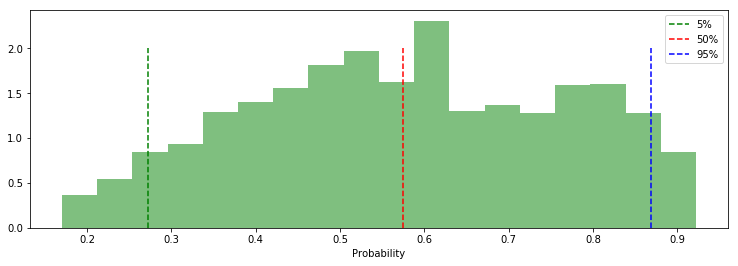

In [293]:
plt.figure(figsize=(12.5,4))
line_height = 2
data = Helpers().averagingModels(np.concatenate(X_list, axis=0), best_models)
x = plt.hist(data, bins='auto', density=True, facecolor='green', alpha=0.5)

plt.vlines(np.percentile(data, 5), 0, line_height, linestyle="--", colors='green', label="5%")
plt.vlines(np.percentile(data, 50), 0, line_height, linestyle="--", colors='red', label="50%")
plt.vlines(np.percentile(data, 95), 0, line_height, linestyle="--", colors='blue', label="95%")
plt.xlabel('Probability')
plt.legend()

In [294]:
rows = []
for model in best_models:
    rows.append(model.get_params())
pd.DataFrame(rows).describe()

,base_score,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_delta_step,max_depth,min_child_weight,n_estimators,n_jobs,random_state,reg_alpha,reg_lambda,scale_pos_weight,subsample
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.0,15.000000,15.000000,15.000000,15.000000
mean,0.564286,0.520153,0.484699,0.553639,0.048267,0.011131,2.733333,4.066667,3.800000,530.733333,-1.0,0.0,1.254035,1.081460,1.003346,0.478552
std,0.025708,0.275175,0.265089,0.284718,0.028848,0.007771,1.709915,0.593617,1.207122,158.380404,0.0,0.0,0.705066,0.685382,0.128962,0.238383
min,0.505308,0.115202,0.104445,0.101469,0.003513,0.004108,0.000000,3.000000,1.000000,345.000000,-1.0,0.0,0.017106,0.055009,0.654100,0.101298
25%,0.548608,0.263092,0.248428,0.289270,0.025282,0.004985,1.000000,4.000000,3.000000,398.000000,-1.0,0.0,0.978945,0.487400,0.985869,0.353993
50%,0.564104,0.596805,0.495391,0.610431,0.051013,0.009413,3.000000,4.000000,4.000000,482.000000,-1.0,0.0,1.501280,1.172532,1.031893,0.525035
75%,0.582519,0.716062,0.634368,0.792650,0.071725,0.013505,4.000000,4.000000,5.000000,660.500000,-1.0,0.0,1.734001,1.633621,1.050408,0.611314
max,0.598446,0.944976,0.929752,0.909500,0.091731,0.032468,5.000000,5.000000,5.000000,797.000000,-1.0,0.0,1.989590,2.000000,1.202258,0.955450


## Train on the entire data set

In [ ]:
from sklearn.metrics import make_scorer
import numpy as np
from xgboost.sklearn import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from time import time

n_calls = 50
cutoff_score = 80

def afl_loss(y_true, y_pred):
    return -np.sum(1 + np.log2(y_true * y_pred + (1 - y_true) * (1 - y_pred)))
scorer = make_scorer(afl_loss, greater_is_better=False, needs_proba=True)

space = {
    'n_estimators': Integer(200, 1000),
    'max_depth': Integer(3, 6),
    'learning_rate': Real(10 ** -4, 0.1, "log-uniform"),
    'gamma': Real(10 ** -5, 0.1, "log-uniform"),
    'min_child_weight': Integer(1, 5),
    'scale_pos_weight': Real(0, 2, "uniform"),
    'max_delta_step': Integer(0, 5),
    'colsample_bytree': Real(0.1, 1.0, "uniform"),
    'colsample_bylevel': Real(0.1, 1.0, "uniform"),
    'colsample_bynode': Real(0.1, 1.0, "uniform"),
    'subsample': Real(0.1, 1.0, "uniform"),
    'reg_lambda': Real(0.0, 2.0, "uniform"),
    'reg_alpha': Real(0.0, 2.0, "uniform"),
        }

classifier = XGBClassifier(base_score=0.57574568288854, n_jobs=-1)

start = time()
opt = BayesSearchCV(classifier, search_spaces=space, scoring=scorer, cv=5, n_iter=n_calls, n_jobs=-1)

# callback handler
def on_step(iteration):
    score = opt.best_score_
    if score > cutoff_score:
        print('Interrupting!')
        return True

opt.fit(Features().div_cols(X), y, callback=on_step)
model = opt.best_estimator_
print('Entire data set')
print("Bayes CV search took %.2f seconds for %d candidates"
        " parameter settings." % ((time() - start), n_calls))
print("val. score:", opt.best_score_)
print(model)

In [ ]:
pd.DataFrame(data=model.feature_importances_,
             index=Features().cols() + ['perc','R_mean'], 
             columns=['importance']).sort_values(by=['importance'], ascending=False)

## Scoring

In [ ]:
from data_prep.web_scraping import Scrape

games = []
start = 134
for i in range(start,start+6):
    games.append(Scrape(mapping, proxyDict).scrape_game(i))
games

In [ ]:
from modelling.scoring import Scoring
scoring = Scoring(mapping, proxyDict).score_data(games)

In [ ]:
def modelStats(X, models=[]):
    predictions = np.column_stack([
        model.predict_proba(X)[:,1] for model in models
    ])
    return [np.mean(predictions, axis=1), np.median(predictions, axis=1), np.std(predictions, axis=1), 
            np.max(predictions, axis=1), np.min(predictions, axis=1)]

arr = np.c_[ games, model.predict_proba(scoring)[:,1], modelStats(scoring,best_models)[0],
           modelStats(scoring,best_models)[1],modelStats(scoring,best_models)[2],
            modelStats(scoring,best_models)[3], modelStats(scoring,best_models)[4]] 
pd.DataFrame(arr,columns=['home','away', 'prob','prob_avg', 'prob_med', 'prob_std', 'prob_max', 'prob_min'])

## Save models

In [ ]:
from joblib import dump
dump(model, 'models/model.joblib') 
for i in range(len(best_models)):
    dump(best_models[i], 'models/model'+str(i)+'.joblib') 

## Load models

In [ ]:
from joblib import load
model = load('models/model.joblib')
best_models = []
for i in range(15):
    best_models.append(load('models/model'+str(i)+'.joblib'))

## Model Analysis

In [295]:
overall = []
for i in range(len(best_models)):
    season_scores = []
    for rnd in range(1,24):
        df = pd.DataFrame(np.c_[X_list[i],y_list[i]])
        y_new = df[df[0] == rnd][17].values
        x_new = df[df[0] == rnd].drop(17, axis=1).values
        score = Helpers().afl_loss(y_new,best_models[i].predict_proba(Features().div_cols(x_new).values)[:,1])
        season_scores.append(score)
    overall.append(season_scores)

Text(0.5, 1.0, 'Average Cumulative Score')

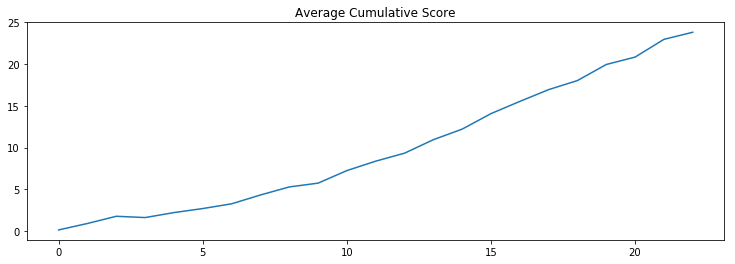

In [296]:
plt.figure(figsize=(12.5,4))
plt.plot(np.cumsum(np.array(np.matrix(np.array(overall)).mean(0)).flatten()))
plt.title('Average Cumulative Score')

In [297]:
data = []
for i in range(15):
    data.append(np.sum(overall[i]))

In [298]:
data_A = np.load('model_A_scores.npy')
data_B = scores.copy()
print(np.sort(data_A))
print(np.sort(data_B))
print(np.mean(data_A))
print(np.mean(data_B))

[14.22454914 15.2045933  15.91451313 17.03966147 18.52530953 19.13225969
 19.46554202 19.53260693 21.53056221 24.01997097 28.2577939  31.80561348
 35.93364907 38.27539488 46.56103408]
[13.3873159  13.96209599 14.56480674 15.38710205 18.51143502 19.12594661
 19.83567973 20.58717347 20.95285508 22.33424182 25.51275025 33.68544116
 37.42131432 38.06445862 43.8885288 ]
24.361536918612867
23.814743036251677


In [299]:
import pymc3 as pm
# The parameters are the bounds of the Uniform.
with pm.Model() as model:
    alpha_A = pm.Exponential('alpha_A', 1/10)
    beta_A = pm.Uniform('beta_A', lower=0, upper=1)
    alpha_B = pm.Exponential('alpha_B', 1/10)
    beta_B = pm.Uniform('beta_B', lower=0, upper=1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", alpha_A/beta_A - alpha_B/beta_B)
    
    obs_A = pm.Gamma("obs_A", alpha=alpha_A, beta=beta_A, observed=data_A)
    obs_B = pm.Gamma("obs_B", alpha=alpha_B, beta=beta_B, observed=data_B)
    
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta_B]
>Metropolis: [alpha_B]
>Metropolis: [beta_A]
>Metropolis: [alpha_A]
Sampling 4 chains: 100%|██████████| 74000/74000 [00:15<00:00, 4783.08draws/s]
The number of effective samples is smaller than 10% for some parameters.


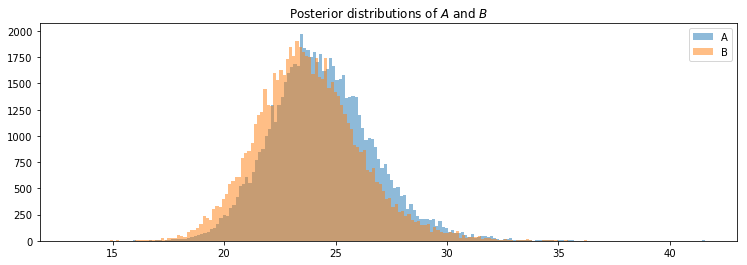

In [300]:
plt.figure(figsize=(12.5,4))
plt.title("Posterior distributions of $A$ and $B$")
plt.hist(burned_trace["alpha_A"]/burned_trace["beta_A"], bins='auto', histtype="stepfilled", alpha=0.5, label="A")
plt.hist(burned_trace["alpha_B"]/burned_trace["beta_B"], bins='auto', histtype="stepfilled", alpha=0.5, label="B")
plt.legend()

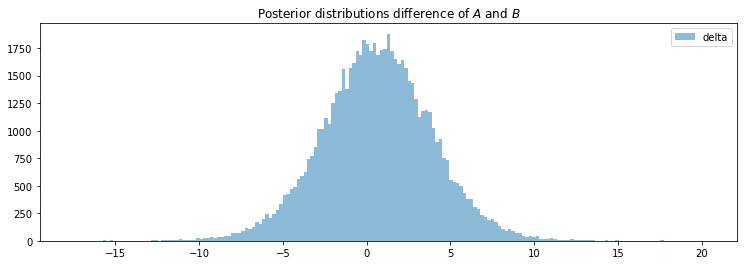

In [301]:
plt.figure(figsize=(12.5,4))
plt.title("Posterior distributions difference of $A$ and $B$")
plt.hist(burned_trace["delta"], bins='auto', histtype="stepfilled", alpha=0.5, label="delta")
plt.legend()

In [302]:
print("Probability model A is WORSE than model B: %.3f" % \
    np.mean(burned_trace["delta"] < 0))

print("Probability model A is BETTER than model B: %.3f" % \
    np.mean(burned_trace["delta"] > 0))

Probability model A is WORSE than model B: 0.422
Probability model A is BETTER than model B: 0.578


## Simulated scores for past seasons

In [ ]:
from modelling.scoring import Simulate
Simulate(mapping,proxyDict).generate_past_scores('training-all', best_models, team_df)

In [ ]:
year = 2018
plt.figure(figsize=(12.5,4))
plt.plot(np.load('training-all/scores-'+str(year)+'.npy')[:,0])
plt.title('Team Season Cumulative Scores')
print(teams)

In [ ]:
plt.figure(figsize=(12.5,4))
plt.plot(np.load('training-all/scores-'+str(year)+'.npy')[:,2])
plt.title('Team Season Rolling Mean Score')
print(teams)